<a href="https://colab.research.google.com/github/ShabnamParveen/MachineLearning-LearningNotebooks/blob/main/pca_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [ ]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [ ]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(42000, 785)

In [ ]:
import matplotlib.pyplot as plt

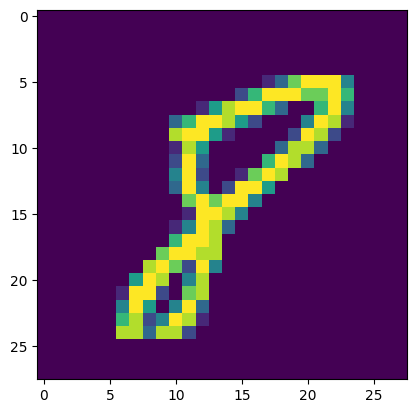

In [ ]:
plt.imshow(df.iloc[18306, 1:].values.reshape(28, 28))

feature and target extraction

In [ ]:
x = df.iloc[:,1:]
y = df.iloc[:, :1]
y

,label
0,1
1,0
2,1
3,4
4,0
...,...
41995,0
41996,1
41997,7
41998,6


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape

(33600, 784)

KNN iportation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
import time
start =time.time()
y_pred = knn.predict(x_test)
end = time.time()
print(end-start)


15.248941659927368


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9648809523809524

Applying PCA

In [ ]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
x = df.iloc[:,1:]
y = df.iloc[:,0]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# pca = PCA(n_components=None) #if None then pca_counts will be = to column_counts
pca = PCA(n_components=100) # It will pick top 100 related colums

In [ ]:
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [ ]:
x_train.shape

(33600, 100)

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
import time
start =time.time()
y_pred = knn.predict(x_test)
end = time.time()
print(end-start)

1.9698491096496582


The above time shows speed has increased of the model

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9535714285714286

Speed has increased so the first benefit of the PCA has been proved.
Now, time to prove the 2nd benefit of PCA which is to visualiza the data into 2D or 3D system

In [ ]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
x = df.iloc[:,1:]
y = df.iloc[:,0]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(x_train)
X_test_trf = pca.transform(x_test)

In [ ]:
X_train_trf

array([[-2.71863145, -0.48987762],
       [-0.67699382, -6.75399175],
       [-3.03322857,  6.50986777],
       ...,
       [ 2.14882408,  0.78079622],
       [ 1.05955822,  0.94775833],
       [17.70256085,  1.96182264]])

In [ ]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [ ]:
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(x_train)
X_test_trf = pca.transform(x_test)

In [ ]:
X_train_trf

array([[-2.71865907, -0.48967198,  1.13543547],
       [-0.67696947, -6.75367594, -2.3365967 ],
       [-3.03322121,  6.50975575,  7.49205108],
       ...,
       [ 2.14885652,  0.78069104, -0.74705473],
       [ 1.05953772,  0.94787959,  3.94996201],
       [17.70254457,  1.96197243, -4.94297779]])

In [ ]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [ ]:
pca.explained_variance_
# Eigen values

array([40.67111198, 29.170234  , 26.7445958 ])

In [ ]:
pca.components_.shape
# Eigen vectors

(3, 784)

In [ ]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [ ]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(x_train)
X_test_trf = pca.transform(x_test)

In [ ]:
pca.explained_variance_.shape

(784,)

In [ ]:
pca.components_.shape

(784, 784)

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

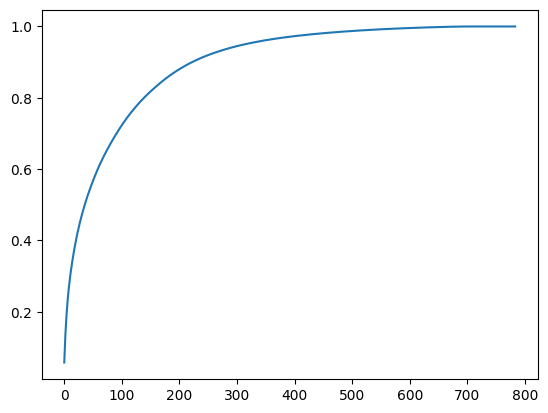

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))